/Users/souvikroy/Desktop/PythonProjects/.venv/lib/python3.10/site-packages/pydmd/snapshots.py:73: UserWarning: Input data condition number 122626553.49244775. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


(34, 34)
(100, 34)


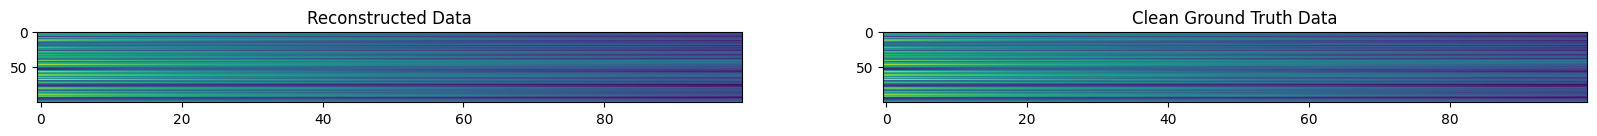

0.004262309593247541
0.9984530854679626


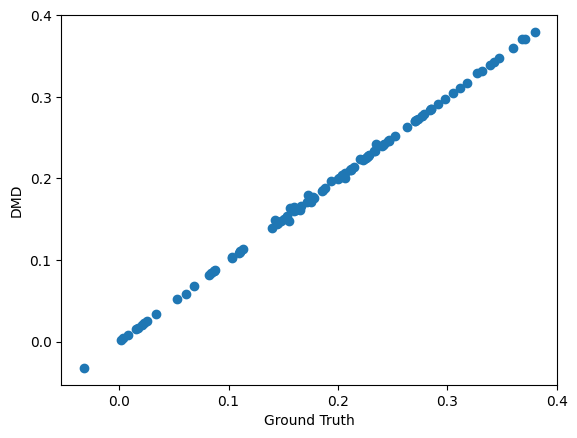

(100, 100)


In [638]:
import numpy as np
import pandas as pd
from pydmd import DMD
from pydmd.plotter import plot_eigs, plot_summary
from pydmd.preprocessing import hankel_preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

# Data = pd.read_csv('Simulation_5.csv',header=None)
# Data = Data.to_numpy()
# FullData = pd.read_csv('simulation_1.csv',header=None)
FullData = pd.read_csv('Reconstructed_State.csv',header=None)
FullData = FullData.to_numpy()

Data = FullData[:,:100]

dmd = DMD(svd_rank=0)

dmd.fit(Data)
#plot_summary(dmd)
print(dmd._Atilde.as_numpy_array.shape)
print(dmd.modes.shape)

plt.figure(figsize= [20,10])
plt.subplot(1,2,1)
plt.title("Reconstructed Data")
plt.imshow(dmd.reconstructed_data.real,cmap='viridis',aspect= 0.1)
plt.subplot(1,2,2)
plt.title("Clean Ground Truth Data")
plt.imshow(Data,cmap='viridis',aspect= 0.1)
plt.show()

rmse = np.sqrt(np.mean((Data - dmd.reconstructed_data.real)**2))
print(rmse)
print(r2_score(Data,dmd.reconstructed_data.real))

plt.figure()
plt.scatter(Data[:,99],dmd.reconstructed_data.real[:,99],marker= 'o')
plt.xlabel('Ground Truth')
plt.ylabel('DMD')
plt.show()
print(Data.shape)


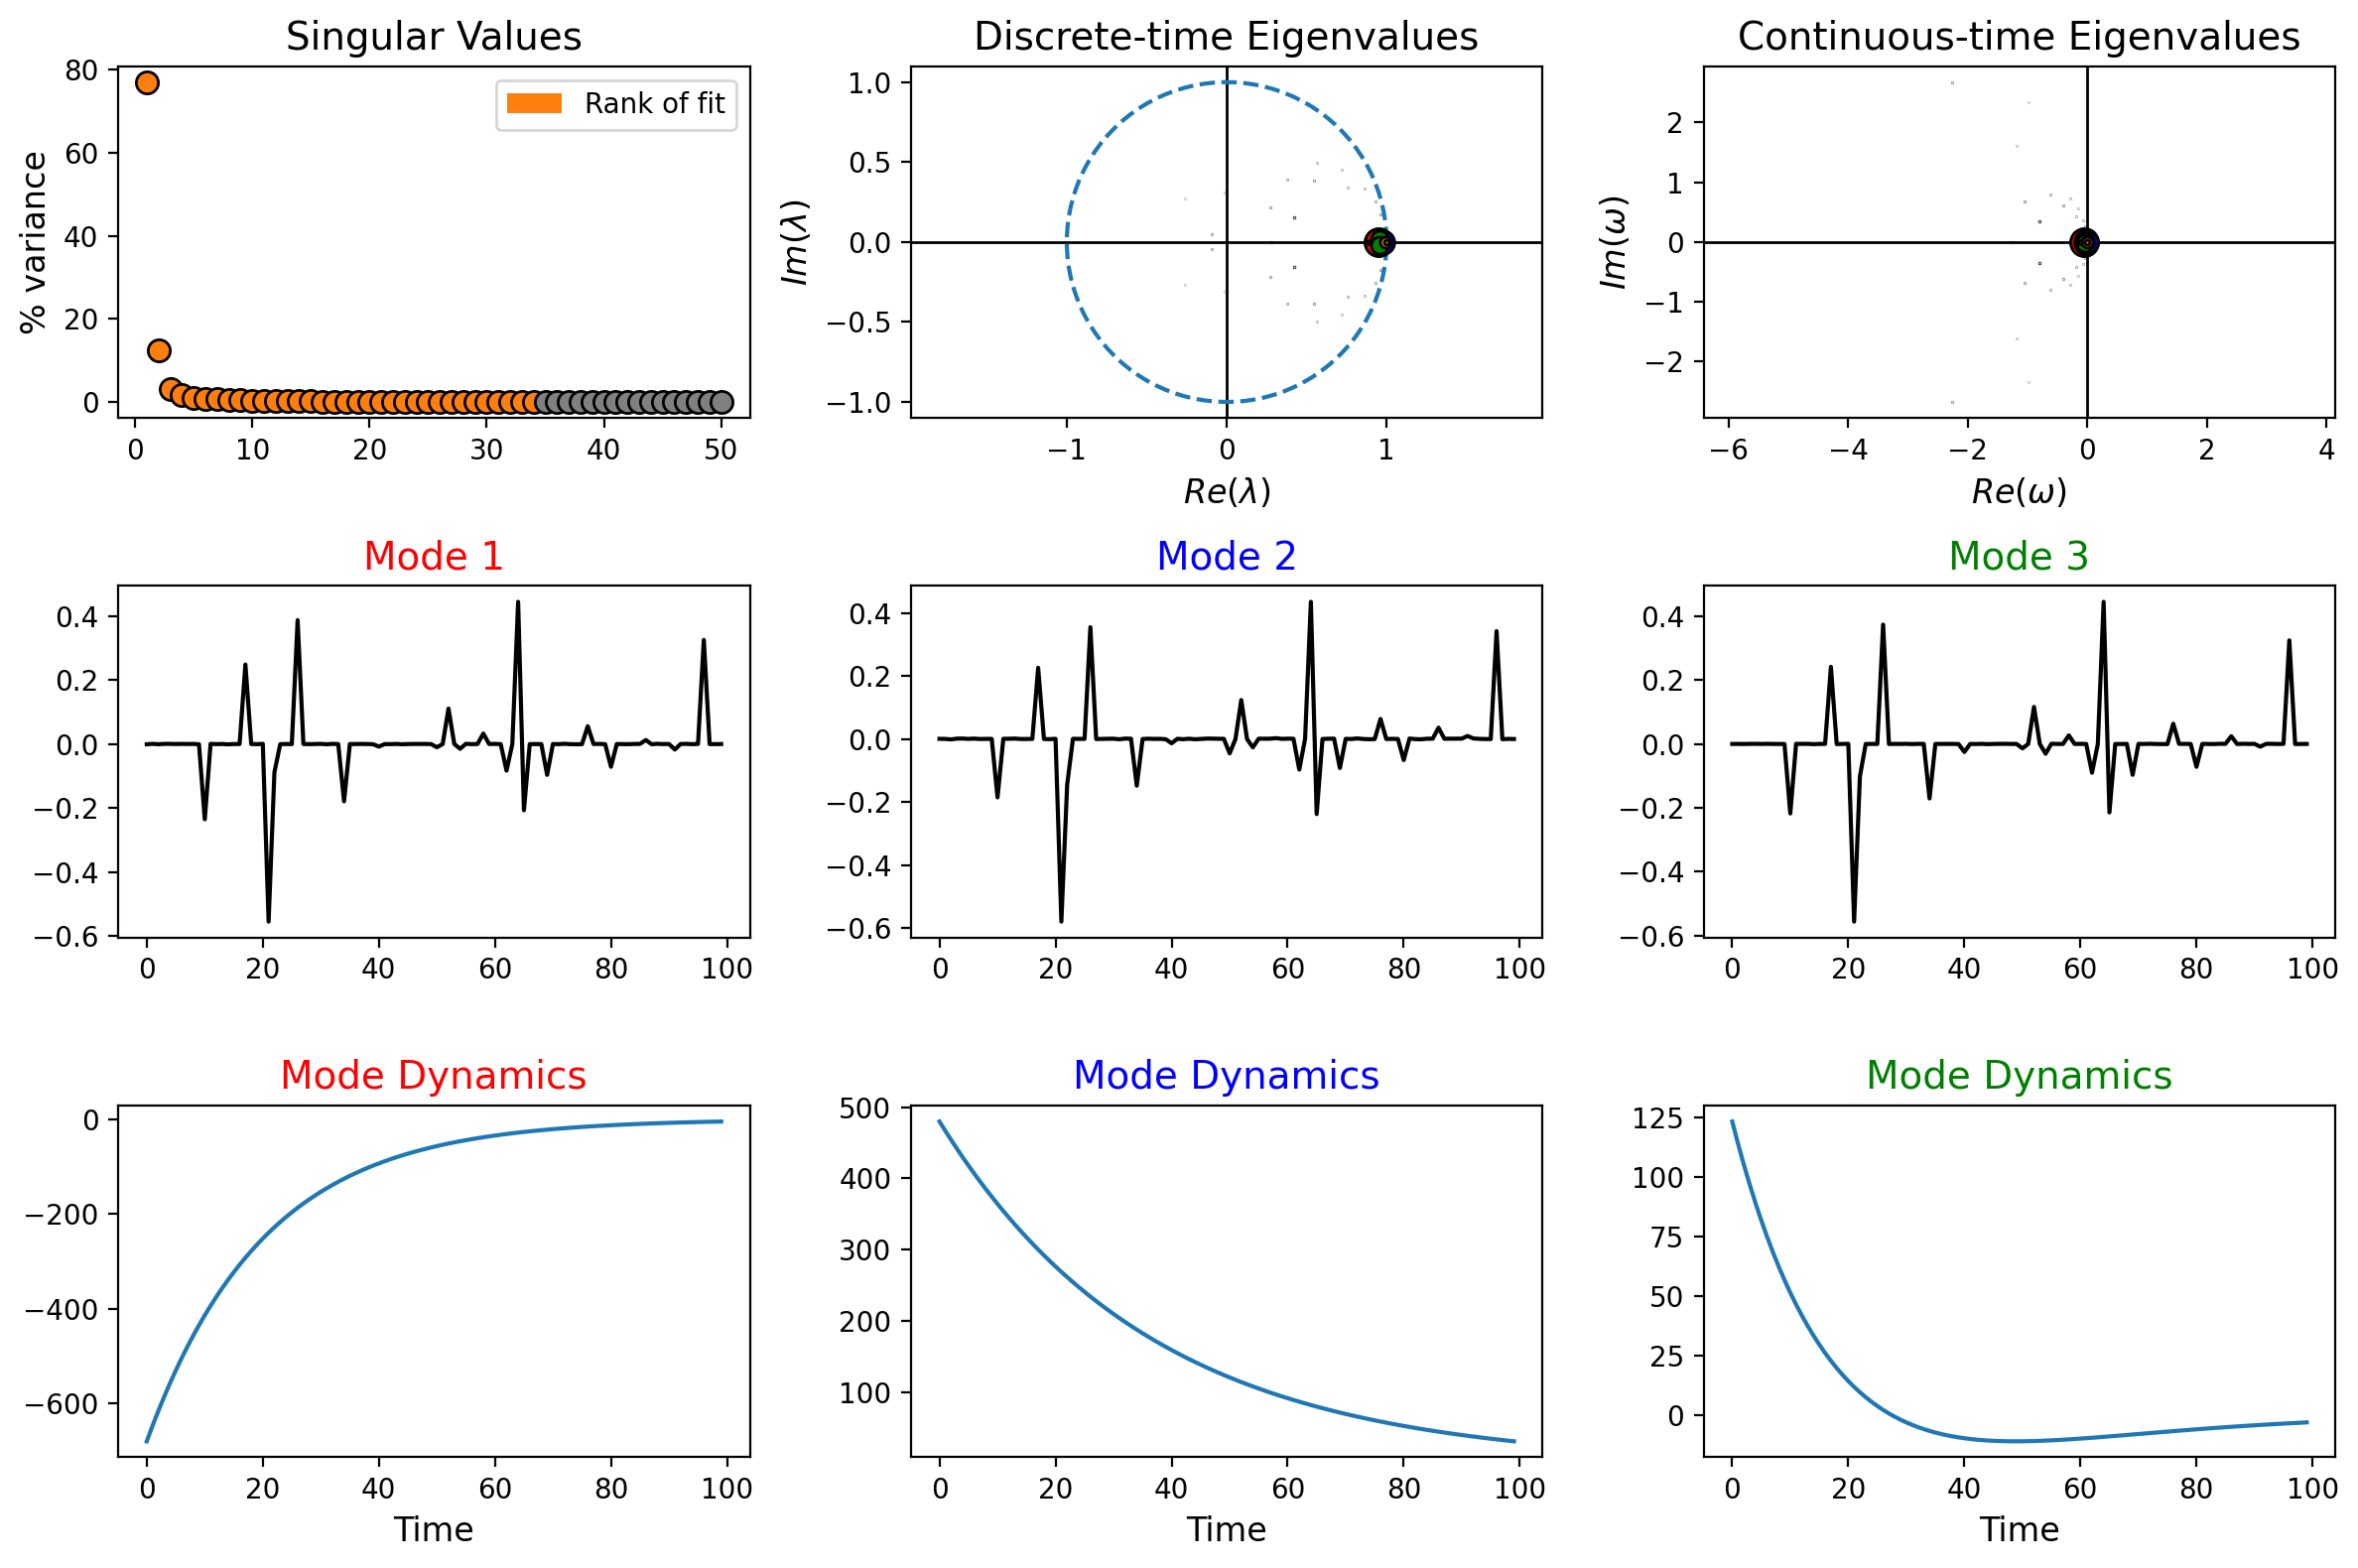

In [639]:
dmd.dynamics
plot_summary(dmd)

(100, 100)


/Users/souvikroy/Desktop/PythonProjects/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/souvikroy/Desktop/PythonProjects/.venv/lib/python3.10/site-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


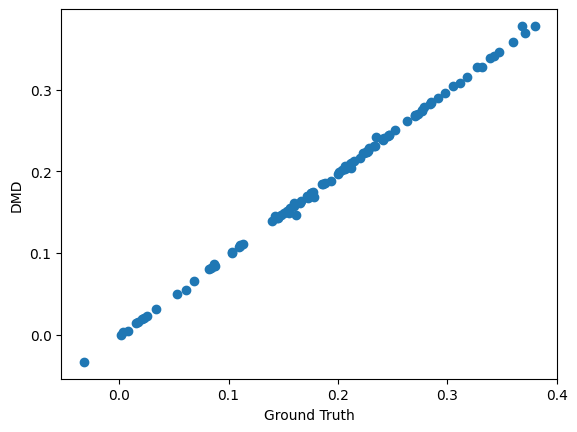

0.0055180225742151165
0.9984098582483231


In [640]:
A = dmd.modes @ np.diag(dmd.eigs) @ np.linalg.pinv(dmd.modes)

print(A.shape)
res = A@Data
plt.figure()
plt.scatter(Data[:,99],res[:,99],marker= 'o')
plt.xlabel('Ground Truth')
plt.ylabel('DMD')
plt.show()

rmse = np.sqrt(np.mean((Data - res.real)**2))
print(rmse)
print(r2_score(Data,res.real))


/Users/souvikroy/Desktop/PythonProjects/.venv/lib/python3.10/site-packages/pydmd/snapshots.py:73: UserWarning: Input data condition number 122626553.49244775. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


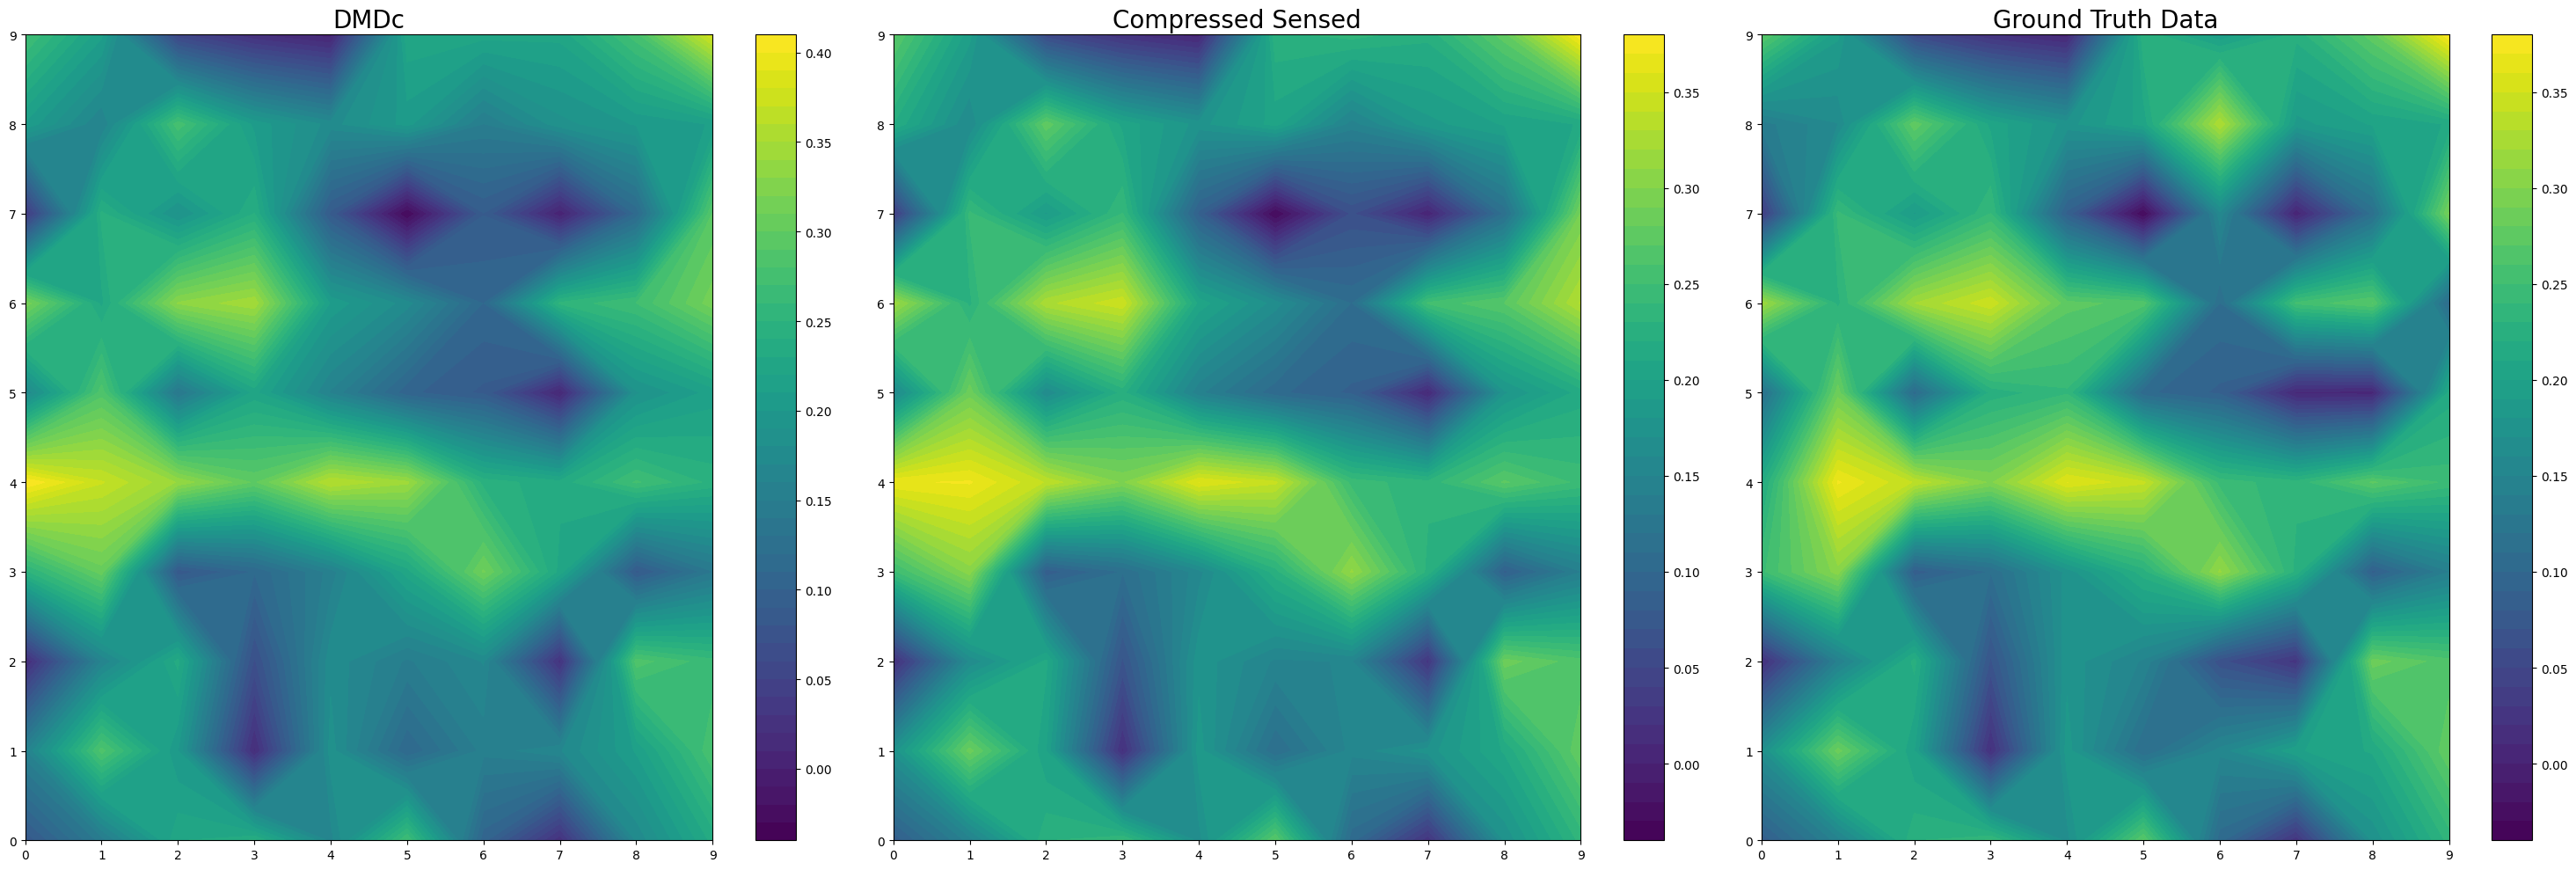

RMSE: 0.0063
R2 Score: 0.9973
RMSE GT: 0.0744


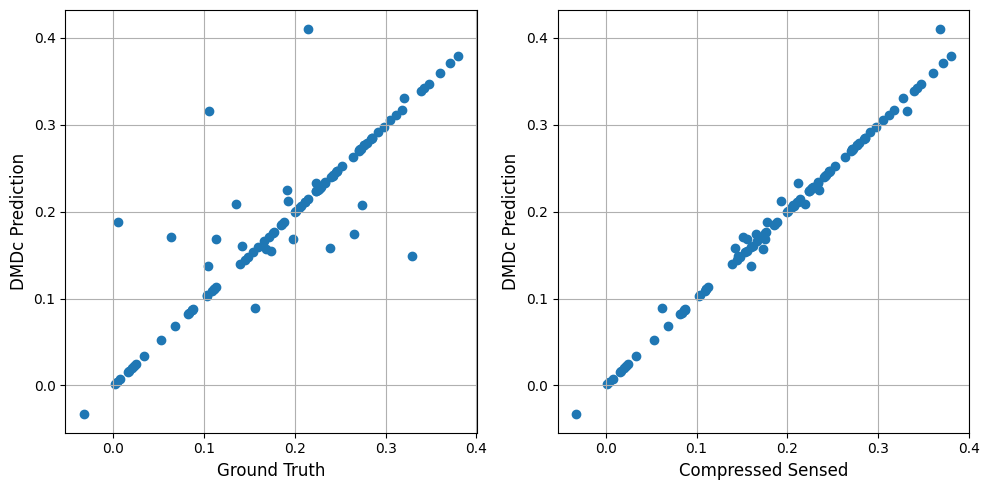

In [643]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from pydmd import DMDc

# Assuming Data and input_vec are preloaded
FullU = pd.read_csv('InputData1.csv', header=None)
FullU = FullU.to_numpy()

U = FullU[:,:100]

# Fit DMDc
dmdc = DMDc(svd_rank=0)
dmdc.fit(Data, U[:99,:].T)

#Ground Truth Data
GT = pd.read_csv('simulation_1.csv', header=None)
GT = GT.to_numpy()
GT = GT[:100,:100]
# Plot results using contourf
plt.figure(figsize=[30, 10])
# Reconstructed Data
plt.subplot(1, 3, 1)
plt.title("DMDc",fontdict={'fontsize': 20})
plt.contourf(
    dmdc.reconstructed_data().real[:,99].reshape([10,10]),  # Select the first slice
    levels = 50,
    cmap='viridis'
)
plt.colorbar()

# Ground Truth Data
plt.subplot(1, 3, 2)
plt.title("Compressed Sensed",fontdict={'fontsize': 20})
plt.contourf(Data[:, 99].reshape([10,10]),  # Select the first slice
             levels = 50,
             cmap='viridis')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Ground Truth Data",fontdict={'fontsize': 20})
plt.contourf(
    GT[:, 99].reshape([10,10]),  # Select the first slice
    levels = 50,
    cmap='viridis')
plt.colorbar()

plt.tight_layout()
plt.show()

# Calculate and print RMSE and R2 score
rmse = np.sqrt(np.mean((Data - dmdc.reconstructed_data().real) ** 2))
rmse_GT = np.sqrt(np.mean((GT[:,:100] - dmdc.reconstructed_data().real) ** 2))
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2_score(Data, dmdc.reconstructed_data().real):.4f}")
print(f"RMSE GT: {rmse_GT:.4f}")

# Scatter plot comparison
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.scatter(GT[:, 99], dmdc.reconstructed_data()[:, 99].real, marker='o')
plt.xlabel('Ground Truth',fontdict={'fontsize': 12})
plt.ylabel('DMDc Prediction',fontdict={'fontsize': 12})
plt.grid(True)
plt.subplot(1, 2, 2)
plt.scatter(Data[:, 99], dmdc.reconstructed_data()[:, 99].real, marker='o')
plt.xlabel('Compressed Sensed',fontdict={'fontsize': 12})
plt.ylabel('DMDc Prediction',fontdict={'fontsize': 12})
plt.grid(True)
plt.tight_layout()
plt.show()


In [631]:
dmdc.reconstructed_data().real[:,98].shape

(10201,)

In [632]:
Data.shape
FullU[:99,:].shape
dmdc.B.shape

(10201, 1)

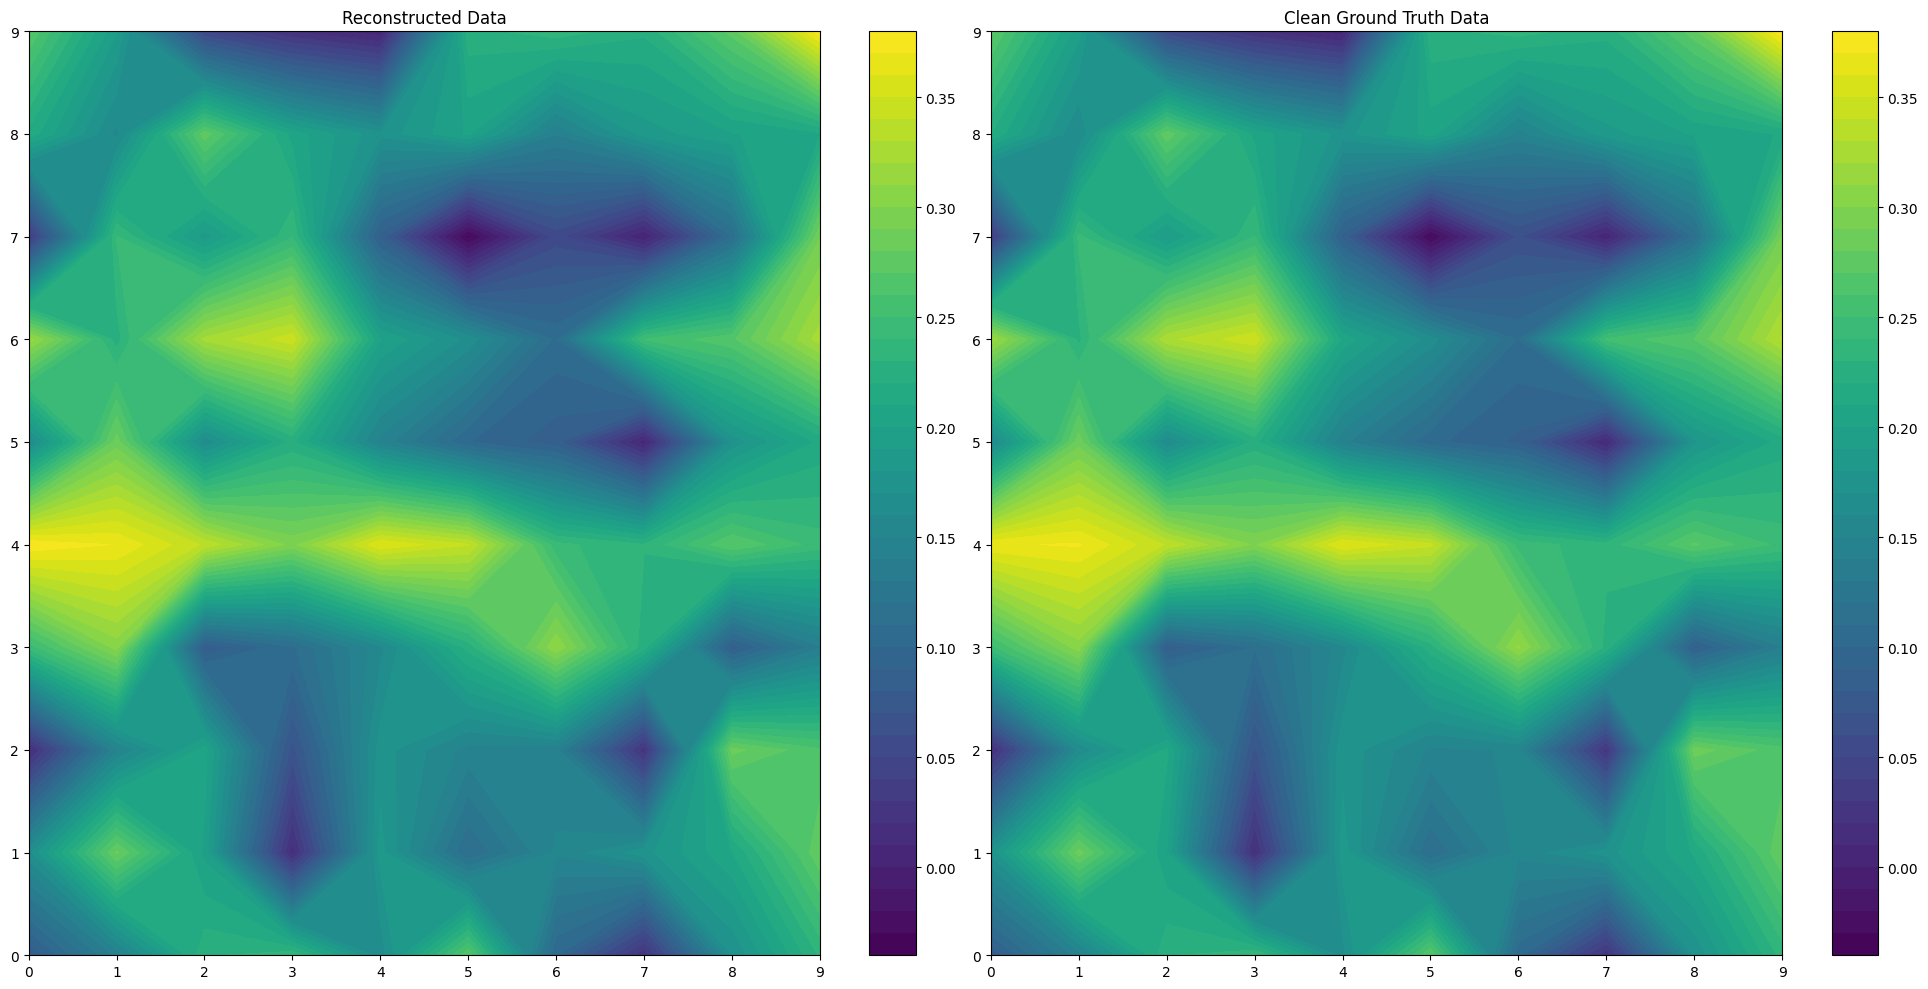

RMSE: 0.005609678794766226
R² Score: 0.9983254209680666


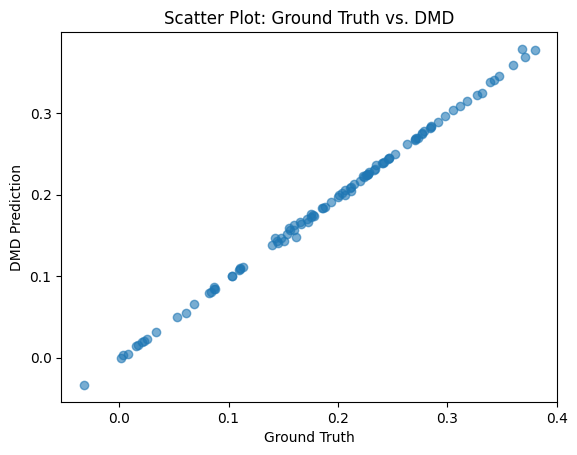

In [645]:
dmdc.eigs.shape
A = dmdc.modes @ np.diag(dmdc.eigs) @ np.linalg.pinv(dmdc.modes)
res = A@Data+dmdc.B@FullU[:100,:].T

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.metrics import r2_score

# Define the same color limits
vmin = min(Data.min(), res.real.min())
vmax = max(Data.max(), res.real.max())
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

plt.figure(figsize=[20, 10])

# Reconstructed Data
plt.subplot(1, 2, 1)
plt.title("Reconstructed Data")
contour1 = plt.contourf(
    res.real[:, 99].reshape([10,10]),  # Select the first slice
    levels=50,
    cmap='viridis',
)
plt.colorbar(contour1)
plt.tight_layout()

# Ground Truth Data
plt.subplot(1, 2, 2)
plt.title("Clean Ground Truth Data")
contour2 = plt.contourf(
    Data[:, 99].reshape([10,10]),  # Select the first slice
    levels=50,
    cmap='viridis',
)
plt.colorbar(contour2)

plt.tight_layout()
plt.show()

# Compute RMSE and R²
rmse = np.sqrt(np.mean((Data - res.real) ** 2))
print(f"RMSE: {rmse}")
print(f"R² Score: {r2_score(Data, res.real)}")

# Scatter plot
plt.figure()
plt.scatter(Data[:, 99], res[:, 99].real, marker='o', alpha=0.6)
plt.xlabel('Ground Truth')
plt.ylabel('DMD Prediction')
plt.title("Scatter Plot: Ground Truth vs. DMD")
plt.show()


/Users/souvikroy/Desktop/PythonProjects/.venv/lib/python3.10/site-packages/matplotlib/contour.py:1515: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
/Users/souvikroy/Desktop/PythonProjects/.venv/lib/python3.10/site-packages/matplotlib/contour.py:1516: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
/Users/souvikroy/Desktop/PythonProjects/.venv/lib/python3.10/site-packages/numpy/ma/core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


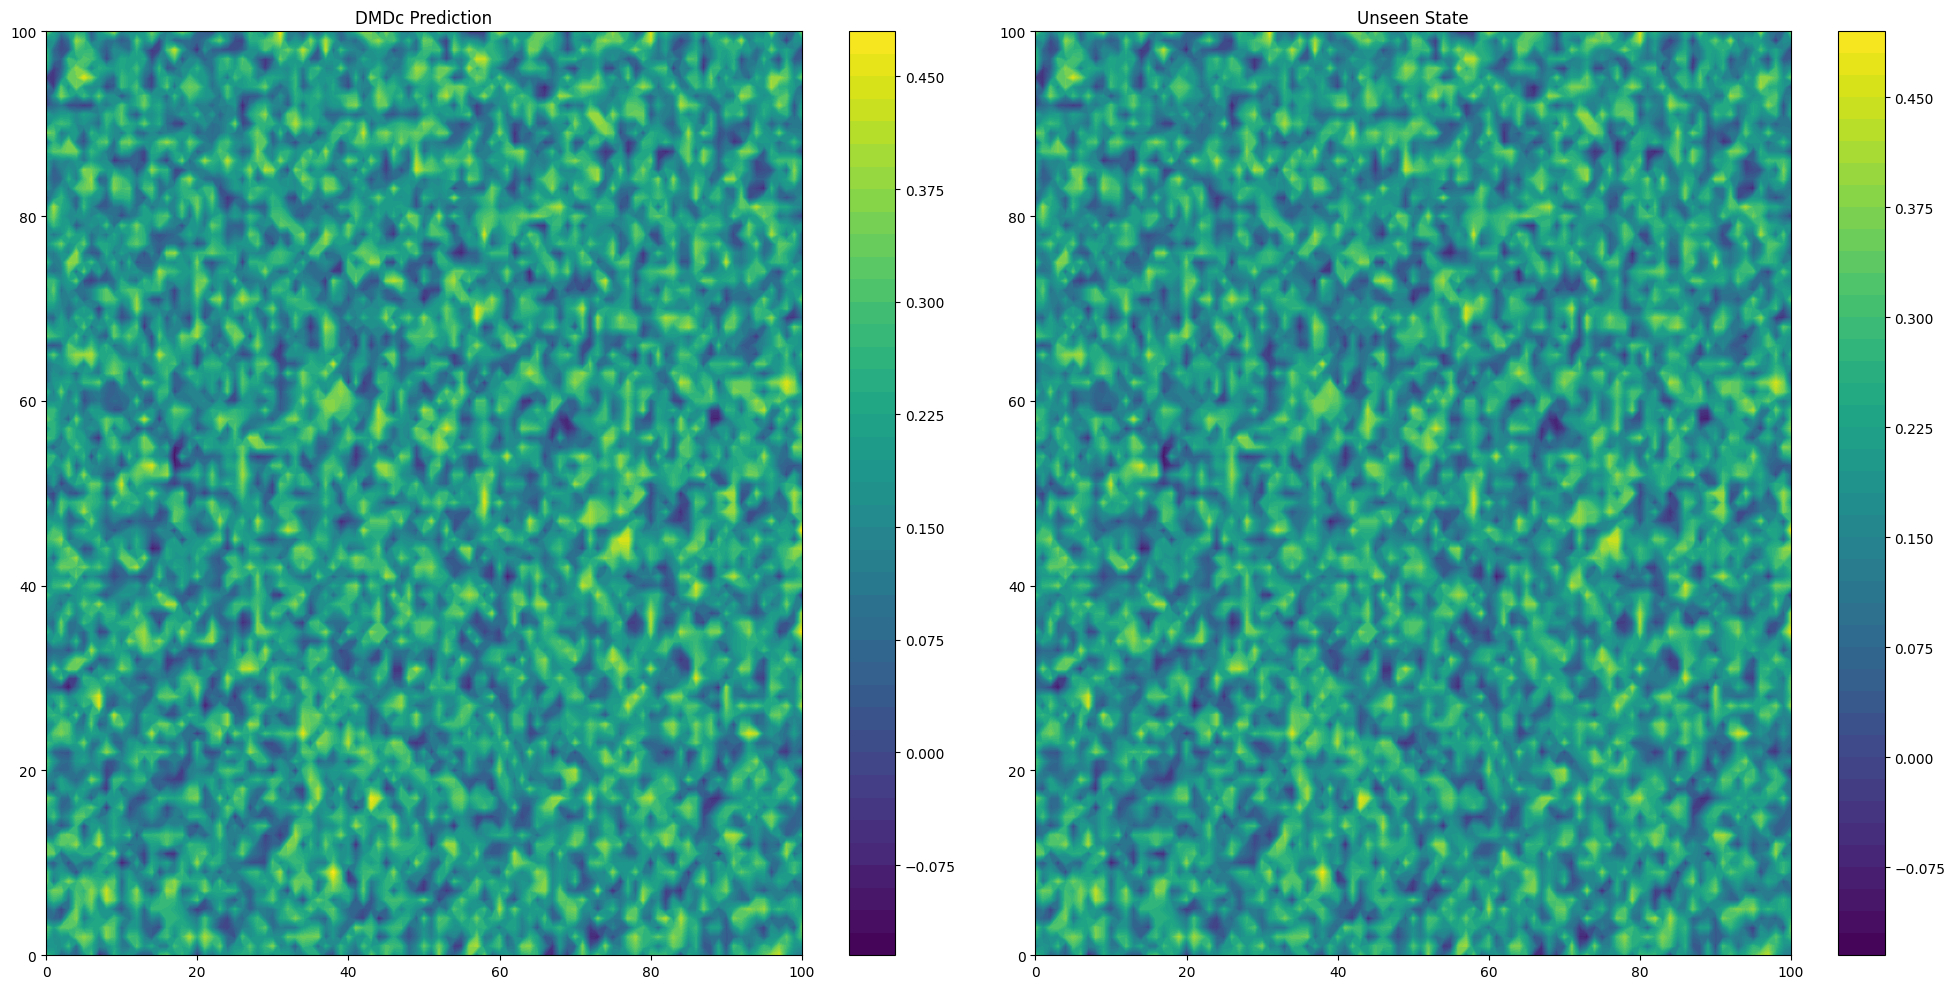

RMSE: 0.030269796351364387


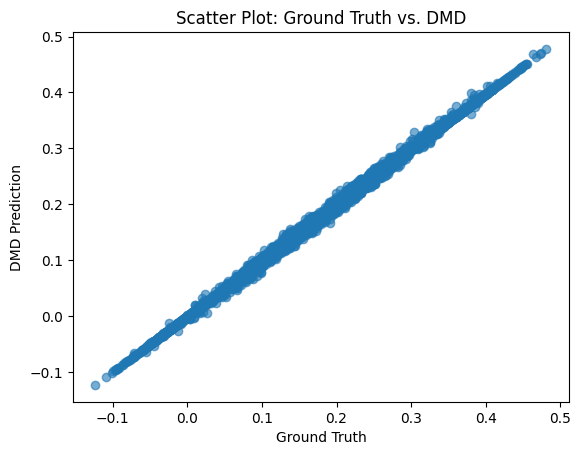

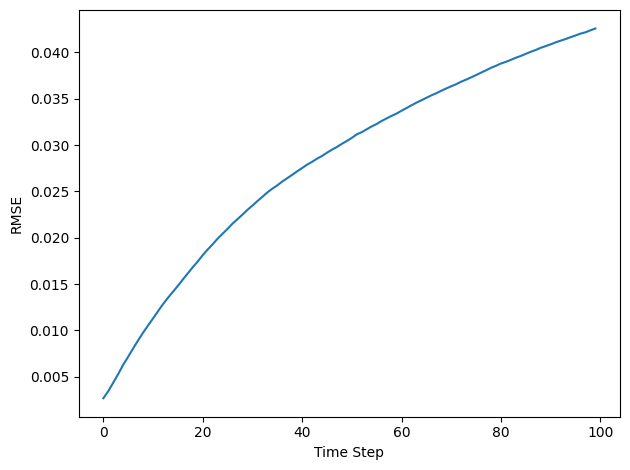

In [634]:
X_unseen = A@FullData[:,100:] +dmdc.B@FullU[100:,:].T

plt.figure(figsize=[20, 10])
plt.subplot(1, 2, 1)
plt.title("DMDc Prediction")
plt.contourf(
    X_unseen[:, 1].reshape([101,101]),  # Select the first slice
    levels=50,
    cmap='viridis',
)
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title("Unseen State")
plt.contourf(
    FullData[:, 101].reshape([101,101]),  # Select the first slice
    levels=50,
    cmap='viridis',
)
plt.colorbar()
plt.tight_layout()
plt.show()
# Compute RMSE and R²
rmse = np.sqrt(np.mean((FullData[:,100:] - X_unseen.real) ** 2))
print(f"RMSE: {rmse}")
# Scatter plot
plt.figure()
plt.scatter(FullData[:, 101], X_unseen[:, 1].real, marker='o', alpha=0.6)
plt.xlabel('Ground Truth')
plt.ylabel('DMD Prediction')
plt.title("Scatter Plot: Ground Truth vs. DMD")
plt.show()

rmse_vec = []

for i in range(100):
    rmse = np.sqrt(np.mean((FullData[:,100+i] - np.real(X_unseen[:, i])) ** 2))
    rmse_vec.append(rmse)

plt.figure()
plt.plot(np.arange(100),rmse_vec)
plt.xlabel('Time Step')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()

In [635]:
import numpy as np
np.random.rand(3,3)

array([[0.43360519, 0.17582374, 0.69389597],
       [0.15547796, 0.80740267, 0.24295726],
       [0.01218543, 0.49954355, 0.1018922 ]])

In [636]:
FullU[101:200].T.shape
FullU[101:200].shape

(99, 1)

In [637]:
import time

FullData = pd.read_csv('Simulation_1.csv',header=None)
FullData = FullData.to_numpy()
# input_vec = pd.read_csv('InputData1.csv', header=None)
# input_vec = input_vec.to_numpy()

Data = FullData[:,101:200]
input_vec = FullU[101:200]


# Data = scaler.fit_transform(Data)
class KalmanFilter:
    def __init__(self, F, B, H, Q, R, x0, P0):
        self.F = F  # State transition model
        self.B = B  
        self.H = H  
        self.Q = Q  
        self.R = R  
        self.x = x0  
        self.P = P0  
    def predict(self, u):
        # Predict the state and state covariance
        self.x = np.dot(self.F, self.x) + np.dot(self.B, u).flatten()
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x
    def update(self, z):
        # Compute the Kalman gain
        S = np.dot(np.dot(self.H, self.P), self.H.T) + self.R
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))  
        
        # Update the state estimate and covariance matrix
        y = z - np.dot(self.H, self.x)
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.P.shape[0])
        self.P = np.dot(I - np.dot(K, self.H), self.P)+ \
                            np.dot(np.dot(K, self.R), K.T)
        return self.x, self.P


Input = np.array(input_vec)

N, timesteps = Data.shape
print(N,timesteps)


B = dmdc.B
print(Input.shape, B.shape) 

F = A

# Random Sampling Matrix
m = int(0.1 * N) 

# Initialize a zero matrix of size m-by-N
H = np.zeros((m, N), dtype=int)

# For each row, randomly assign one element to 1
for i in range(m):
    random_index = np.random.randint(N)  # Select a random index between 0 and N-1
    H[i, random_index] = 1  # Set that index to 1

# Print the generated selection matrix
print(H.shape)

Zm = H @ Data[:,1]
print(Zm.shape)

Q = 1e6*np.eye(N)
R = 1e-10*np.eye(m)

x0 = np.random.rand(Data[:,0].shape[0])
#x0= Data[:,0]
print(f'x0\t{x0.shape}')
P0 = Q
mean_error = []
rel_error = []
rmse_vec = []
for i in range(98): #timesteps-1
    print(i)                  
    # Create Kalman Filter instance
    kf = KalmanFilter(F, B, H, Q, R, x0, P0)
    # Predict and update with the control input and measurement
    u = Input[i]
    z = H @ Data[:,i+1]
    # Predict step
    predicted_state = kf.predict(u)
    # print("Predicted state:\n", predicted_state)
    # Update step
    
    updated_state = kf.update(z)
    x0 = updated_state[0]
    P0 = updated_state[1]
    # print("Updated state:\n", updated_state[0].real)
    # print(np.sqrt(np.mean((U@updated_state[0]-GT[:,i+1])**2)))
    # print(np.sqrt(np.mean((Data[:,i+1]-GT[:,i+1])**2)))
    rmse_vec.append(np.sqrt(np.mean((Data[:,i+1]-updated_state[0].real)**2)))
    mean_error.append(np.sqrt(np.mean((updated_state[0].real-Data[:,i+1])**2)))
    rel_error.append(np.sum(100*np.abs(updated_state[0].real-Data[:,i+1]))/np.sum(Data[:,i+1]))
    print(f'RMSE:\t{np.sqrt(np.mean((updated_state[0].real-Data[:,i+1])**2))}')
    print(f'Mean Absulote Error:\t{np.mean(np.abs(updated_state[0].real-Data[:,i+1]))}')
    print(f'Total Relative Error:\t{np.sum(100*np.abs(updated_state[0].real-Data[:,i+1]))/np.sum(np.abs(Data[:,i+1]))}')

10201 99
(99, 1) (10201, 1)
(1020, 10201)
(1020,)
x0	(10201,)
0


KeyboardInterrupt: 

In [ ]:
np.shape(dmdc.B)

(121, 1)

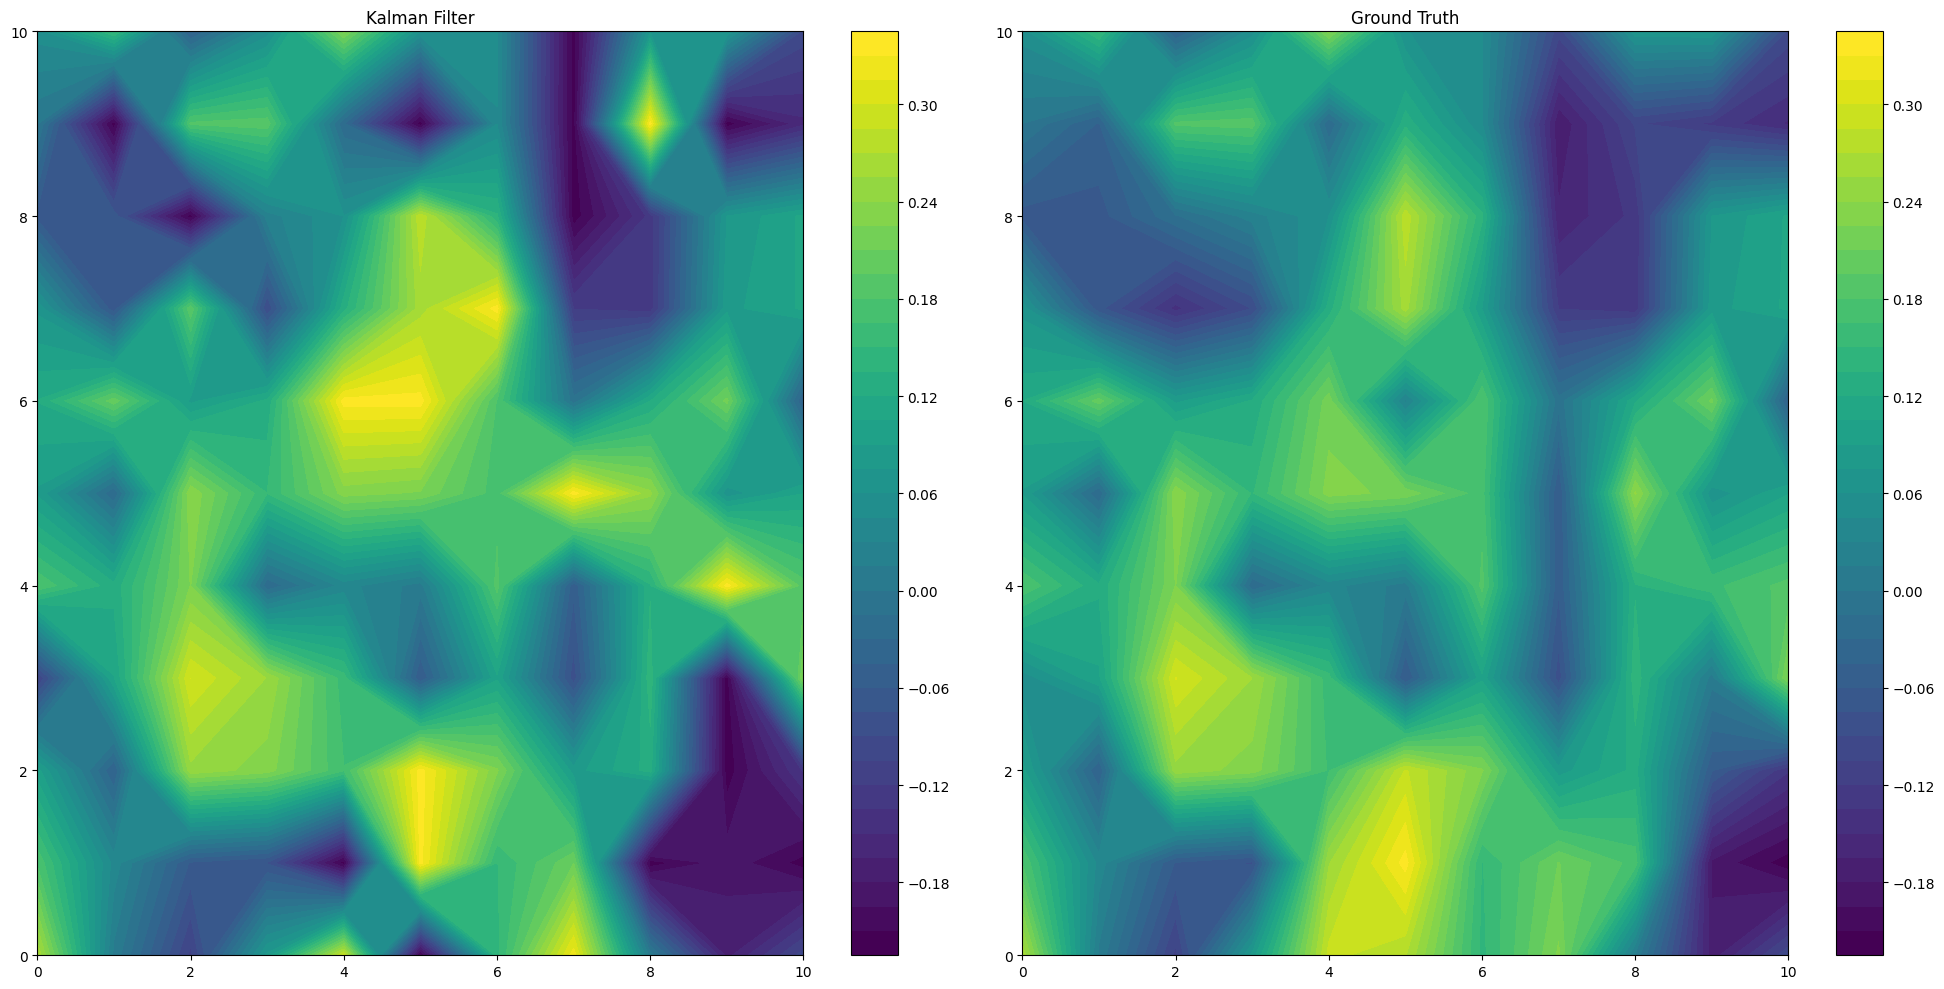

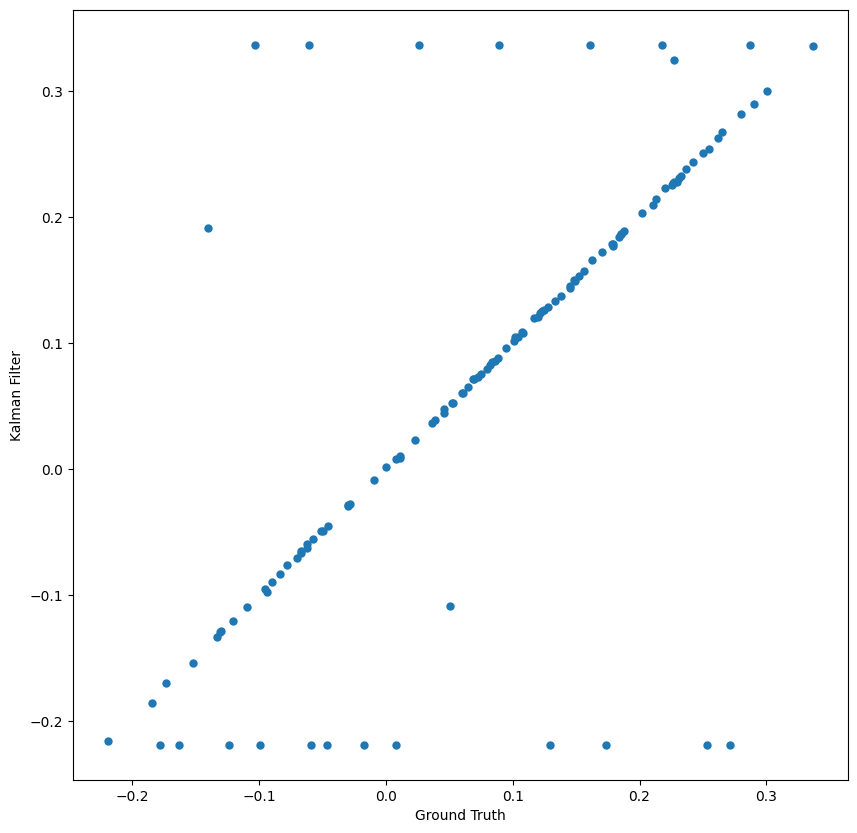

In [ ]:
kalman_data = updated_state[0].real.reshape([101,101])
ground_truth = Data[:, 98].reshape([101,101])

for i in range(ground_truth.shape[0]):
    for j in range(ground_truth.shape[1]):
        if kalman_data[i, j] < ground_truth.min():
            kalman_data[i, j] = ground_truth.min()
        elif kalman_data[i, j] > ground_truth.max():
            kalman_data[i, j] = ground_truth.max()

# Find the min and max values across both datasets for consistent color scale
vmin = min(kalman_data.min(), ground_truth.min())
vmax = max(kalman_data.max(), ground_truth.max())

plt.figure(figsize=[20, 10])

# Plot the Kalman Filter Data
plt.subplot(1, 2, 1)
plt.title("Kalman Filter")
plt.contourf(kalman_data,cmap='viridis', levels=50, vmin=vmin, vmax=vmax)
plt.colorbar()

# Plot the Clean Ground Truth Data
plt.subplot(1, 2, 2)
plt.title("Ground Truth")
plt.contourf(ground_truth, cmap='viridis', levels=50, vmin=vmin, vmax=vmax)
plt.colorbar()

plt.tight_layout()
plt.show()


plt.figure(figsize=[10,10])
plt.scatter(Data[:, 98], updated_state[0].real, linewidths=0.01)
plt.xlabel('Ground Truth')
plt.ylabel('Kalman Filter')
plt.show()


In [ ]:
print(H.shape)
print(F.shape)
print(B.shape)
print(x0.shape)
print(P0.shape)
print(Q.shape)
print(R.shape)
print(z.shape)
print(kf.x.shape)

(12, 121)
(121, 121)
(121, 1)
(121,)
(121, 121)
(121, 121)
(12, 12)
(12,)
(121,)


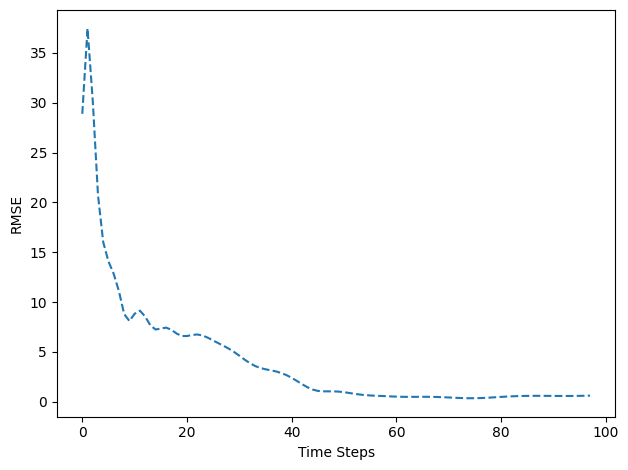

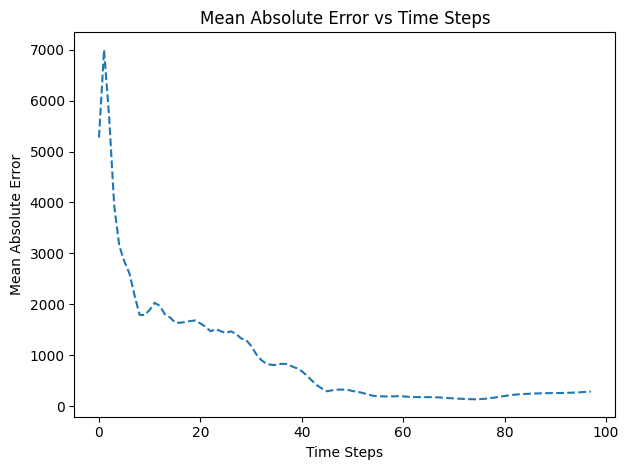

In [ ]:
#Error Showing with timesteps
t=np.arange(98)

plt.figure()
plt.plot(t,rmse_vec,'--')
plt.xlabel('Time Steps')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(t,rel_error,'--')
plt.xlabel('Time Steps')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error vs Time Steps')
plt.tight_layout()
plt.show()

In [ ]:
for i in range(ground_truth.shape[0]):
    for j in range(ground_truth.shape[1]):
        if kalman_data[i, j] < ground_truth.min():
            kalman_data[i, j] = 0
            ground_truth[i, j] = 0
        elif kalman_data[i, j] > ground_truth.max():
            kalman_data[i, j] = 0
            ground_truth[i, j] = 0

rmse_new = np.sqrt(np.mean((ground_truth - kalman_data) ** 2))
rmse_new
mae_new = np.mean(np.abs(ground_truth - kalman_data))
mae_new
TSE_new = np.sum(100*np.abs(ground_truth - kalman_data))/np.sum(np.abs(ground_truth))
TSE_new

33.35902094658034

In [723]:
import time

FullData = pd.read_csv('Simulation_1.csv',header=None)
FullData = FullData.to_numpy()
# input_vec = pd.read_csv('InputData1.csv', header=None)
# input_vec = input_vec.to_numpy()

Data = FullData[100:200,:]
input_vec = FullU


# Data = scaler.fit_transform(Data)
class KalmanFilter:
    def __init__(self, F, B, H, Q, R, x0, P0):
        self.F = F  # State transition model
        self.B = B  
        self.H = H  
        self.Q = Q  
        self.R = R  
        self.x = x0  
        self.P = P0  
    def predict(self, u):
        # Predict the state and state covariance
        self.x = np.dot(self.F, self.x) + np.dot(self.B, u).flatten()
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x
    def update(self, z):
        # Compute the Kalman gain
        S = np.dot(np.dot(self.H, self.P), self.H.T) + self.R
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))  
        
        # Update the state estimate and covariance matrix
        y = z - np.dot(self.H, self.x)
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.P.shape[0])
        self.P = np.dot(I - np.dot(K, self.H), self.P)+ \
                            np.dot(np.dot(K, self.R), K.T)
        return self.x, self.P


Input = np.array(input_vec)

N, timesteps = Data.shape
print(N,timesteps)


B = dmdc.B
print(Input.shape, B.shape) 

F = A

# Random Sampling Matrix
m = int(0.1 * N) 

# Initialize a zero matrix of size m-by-N
H = np.zeros((m, N), dtype=int)

# For each row, randomly assign one element to 1
for i in range(m):
    random_index = np.random.randint(N)  # Select a random index between 0 and N-1
    H[i, random_index] = 1  # Set that index to 1

# Print the generated selection matrix
print(H.shape)

Zm = H @ Data[:,1]
print(Zm.shape)

Q = 1e-20*np.eye(N)
R = 1e5*np.eye(m)

x0 = np.random.rand(Data[:,0].shape[0])
#x0= Data[:,0]
print(f'x0\t{x0.shape}')
P0 = Q
mean_error = []
rel_error = []
rmse_vec = []
for i in range(timesteps-1): #timesteps-1
    print(i)                  
    # Create Kalman Filter instance
    kf = KalmanFilter(F, B, H, Q, R, x0, P0)
    # Predict and update with the control input and measurement
    u = Input[i]
    z = H @ Data[:,i+1]
    # Predict step
    predicted_state = kf.predict(u)
    # print("Predicted state:\n", predicted_state)
    # Update step
    
    updated_state = kf.update(z)
    x0 = updated_state[0]
    P0 = updated_state[1]
    # print("Updated state:\n", updated_state[0].real)
    # print(np.sqrt(np.mean((U@updated_state[0]-GT[:,i+1])**2)))
    # print(np.sqrt(np.mean((Data[:,i+1]-GT[:,i+1])**2)))
    rmse_vec.append(np.sqrt(np.mean((Data[:,i+1]-updated_state[0].real)**2)))
    mean_error.append(np.sqrt(np.mean((updated_state[0].real-Data[:,i+1])**2)))
    rel_error.append(np.sum(100*np.abs(updated_state[0].real-Data[:,i+1]))/np.sum(Data[:,i+1]))
    print(f'RMSE:\t{np.sqrt(np.mean((updated_state[0].real-Data[:,i+1])**2))}')
    print(f'Mean Absulote Error:\t{np.mean(np.abs(updated_state[0].real-Data[:,i+1]))}')
    print(f'Total Relative Error:\t{np.sum(100*np.abs(updated_state[0].real-Data[:,i+1]))/np.sum(np.abs(Data[:,i+1]))}')

100 200
(200, 1) (100, 1)
(10, 100)
(10,)
x0	(100,)
0
RMSE:	18.495921042319754
Mean Absulote Error:	7.300148055700432
Total Relative Error:	1408.0150447269657
1
RMSE:	18.842133885019688
Mean Absulote Error:	6.869445122784982
Total Relative Error:	1337.9510663972105
2
RMSE:	17.260838803320365
Mean Absulote Error:	6.045374370743591
Total Relative Error:	1189.0020320778406
3
RMSE:	13.152946449593143
Mean Absulote Error:	4.3856817207614585
Total Relative Error:	871.034347238061
4
RMSE:	11.376676456402938
Mean Absulote Error:	4.4725155755516495
Total Relative Error:	896.9883847256951
5
RMSE:	12.936503860372143
Mean Absulote Error:	4.723482234495084
Total Relative Error:	956.6038118247815
6
RMSE:	16.39034190260817
Mean Absulote Error:	5.927816326223685
Total Relative Error:	1212.264971919728
7
RMSE:	18.771902384322424
Mean Absulote Error:	7.14354554147454
Total Relative Error:	1475.189532806162
8
RMSE:	18.83822621513747
Mean Absulote Error:	7.231623610796434
Total Relative Error:	1507.992725

200

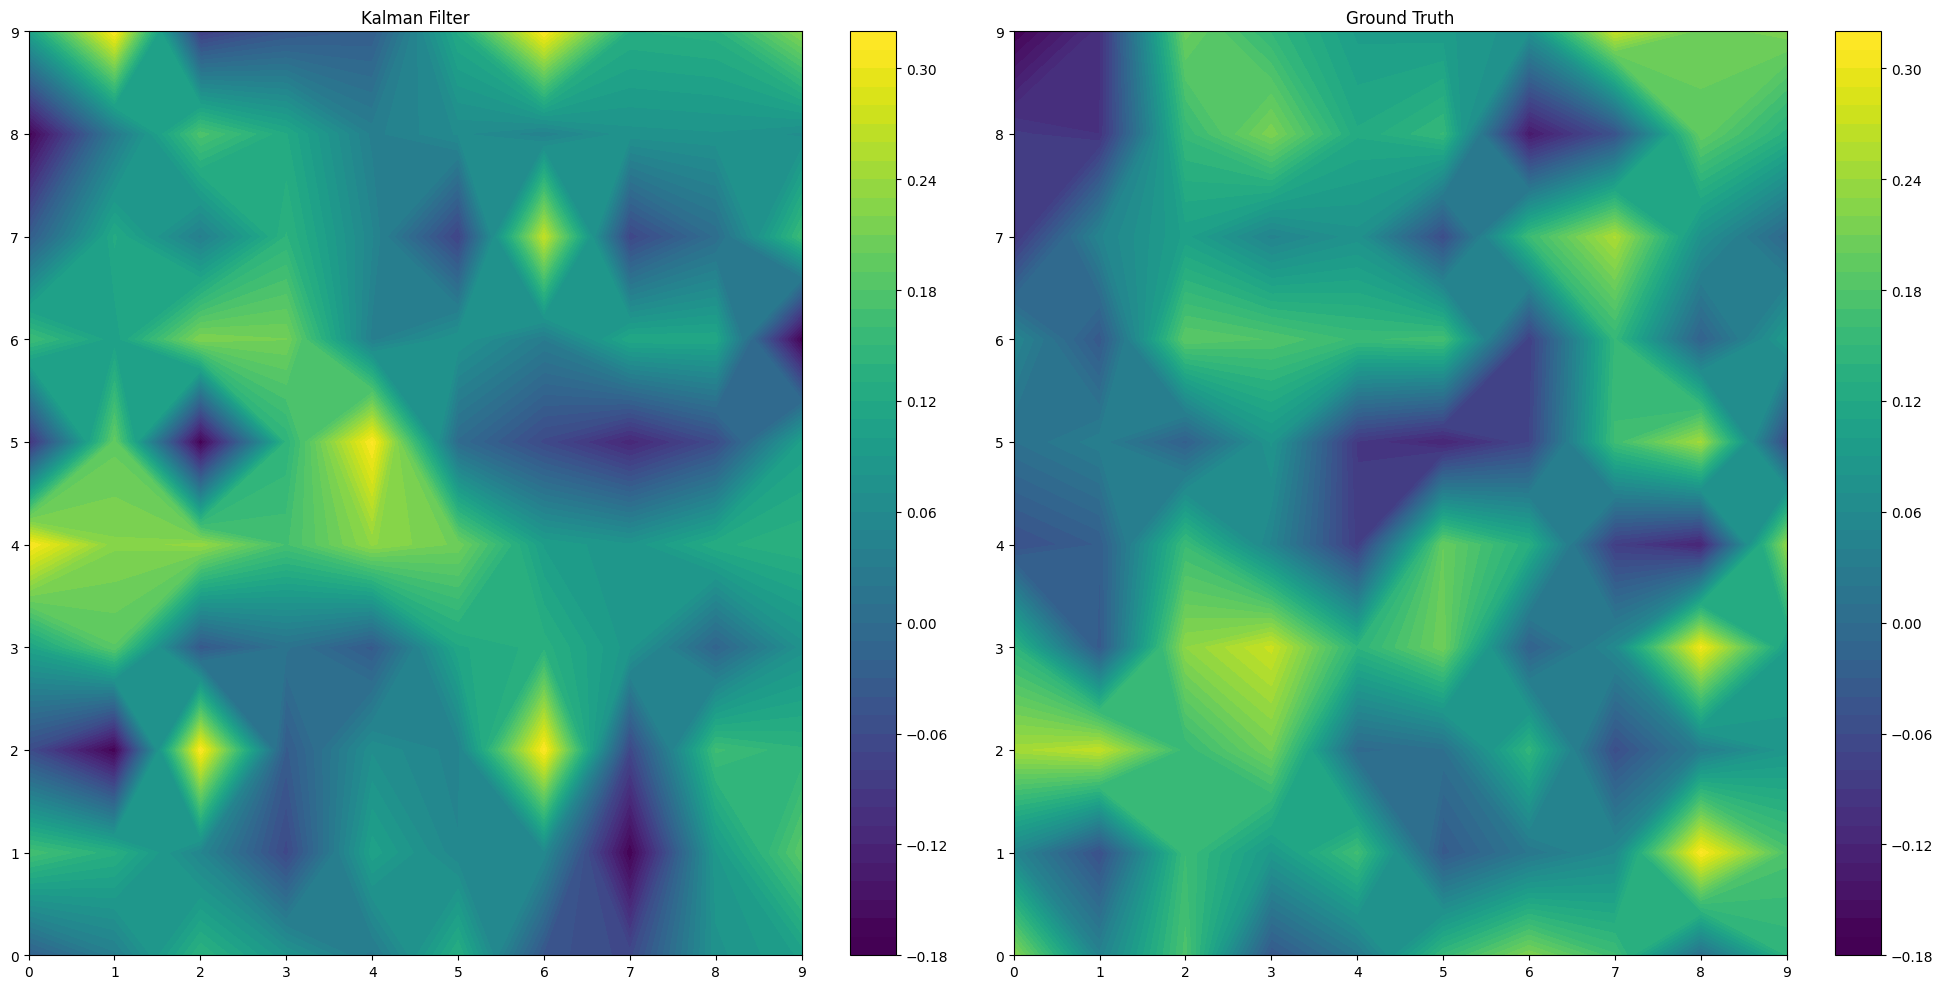

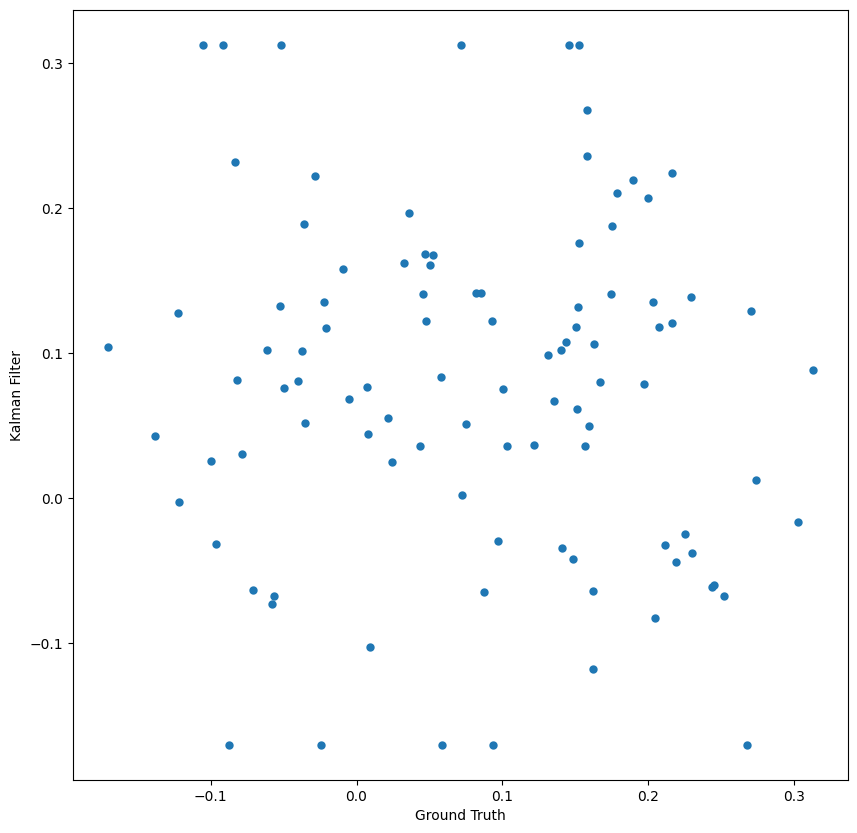

In [724]:
kalman_data = updated_state[0].real.reshape([10,10])
ground_truth = Data[:, 198].reshape([10,10])

for i in range(ground_truth.shape[0]):
    for j in range(ground_truth.shape[1]):
        if kalman_data[i, j] < ground_truth.min():
            kalman_data[i, j] = ground_truth.min()
        elif kalman_data[i, j] > ground_truth.max():
            kalman_data[i, j] = ground_truth.max()

# Find the min and max values across both datasets for consistent color scale
vmin = min(kalman_data.min(), ground_truth.min())
vmax = max(kalman_data.max(), ground_truth.max())

plt.figure(figsize=[20, 10])

# Plot the Kalman Filter Data
plt.subplot(1, 2, 1)
plt.title("Kalman Filter")
plt.contourf(kalman_data,cmap='viridis', levels=50, vmin=vmin, vmax=vmax)
plt.colorbar()

# Plot the Clean Ground Truth Data
plt.subplot(1, 2, 2)
plt.title("Ground Truth")
plt.contourf(ground_truth, cmap='viridis', levels=50, vmin=vmin, vmax=vmax)
plt.colorbar()

plt.tight_layout()
plt.show()


plt.figure(figsize=[10,10])
plt.scatter(Data[:, 198], updated_state[0].real, linewidths=0.01)
plt.xlabel('Ground Truth')
plt.ylabel('Kalman Filter')
plt.show()


In [666]:
kalman_data

array([[0.05600644, 0.05600644, 0.06908702, 0.05600644, 0.05600644,
        0.01572999, 0.05600644, 0.05600644, 0.05026958, 0.1033389 ],
       [0.41745708, 0.04329231, 0.05600644, 0.05600644, 0.25927055,
        0.03580991, 0.05600644, 0.05600644, 0.05600644, 0.36442764],
       [0.05600644, 0.41745708, 0.15122883, 0.05600644, 0.03519724,
        0.05047125, 0.41745708, 0.05600644, 0.24113468, 0.12561359],
       [0.03645675, 0.19880567, 0.05600644, 0.05600644, 0.41745708,
        0.0184285 , 0.0433864 , 0.05600644, 0.05600644, 0.09943363],
       [0.41745708, 0.3511043 , 0.24240909, 0.20428781, 0.30500242,
        0.24108609, 0.13052776, 0.04439064, 0.05600644, 0.22812598],
       [0.41745708, 0.29749554, 0.05600644, 0.08074814, 0.41745708,
        0.05600644, 0.05600644, 0.05600644, 0.05600644, 0.01289995],
       [0.02038005, 0.09654981, 0.41745708, 0.32969251, 0.05600644,
        0.05600644, 0.05600644, 0.11201403, 0.06463299, 0.09226069],
       [0.05600644, 0.11016496, 0.0560064